# Análisis Exploratorio de Datos (EDA): Clasificador de vinos

## Planteamiento del problema y recopilación de datos

In [40]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import numpy as np
from numpy._core.defchararray import upper

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest



# Leer el archivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';') # Este archivo CSV contiene punto y coma como separadores

print(df.head())
print(df.columns) 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Exploración y limpieza de datos

Comprobamos las dimensiones del dataframe y, además de si los datos concuerdan con el número total, vemos el tipo de dato y podemos separar entre variables categóricas y numéricas

In [41]:
print(f"Dimensiones del dataframe: {df.shape}")
print(df.info())

Dimensiones del dataframe: (1599, 12)
<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Procedemos a contabilizar los nulos y únicos: 

In [42]:
print(f"Valores null por columna: \n{df.isnull().sum()}")
print(f"Valores unicos por columna: \n{df.nunique()}")
total_dataf = df #Cambiamos el nombre del dataframe por uno mas completo

Valores null por columna: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Valores unicos por columna: 
fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


#### Resumen de cada columna:

Cada fila representa un tipo de vino distinto según su composición química:  

fixed acidity, volatile acidity, citric acid  
residual sugar, chlorides  
free sulfur dioxide, total sulfur dioxide  
density, pH, sulphates, alcohol  

y la variable objetivo "quality" representa la calidad de cada uno:  

0 = Baja calidad  

1 = Calidad media  

2 = Alta calidad  

## Análisis de variables univariante

### Generamos gráficos con los valores numéricos

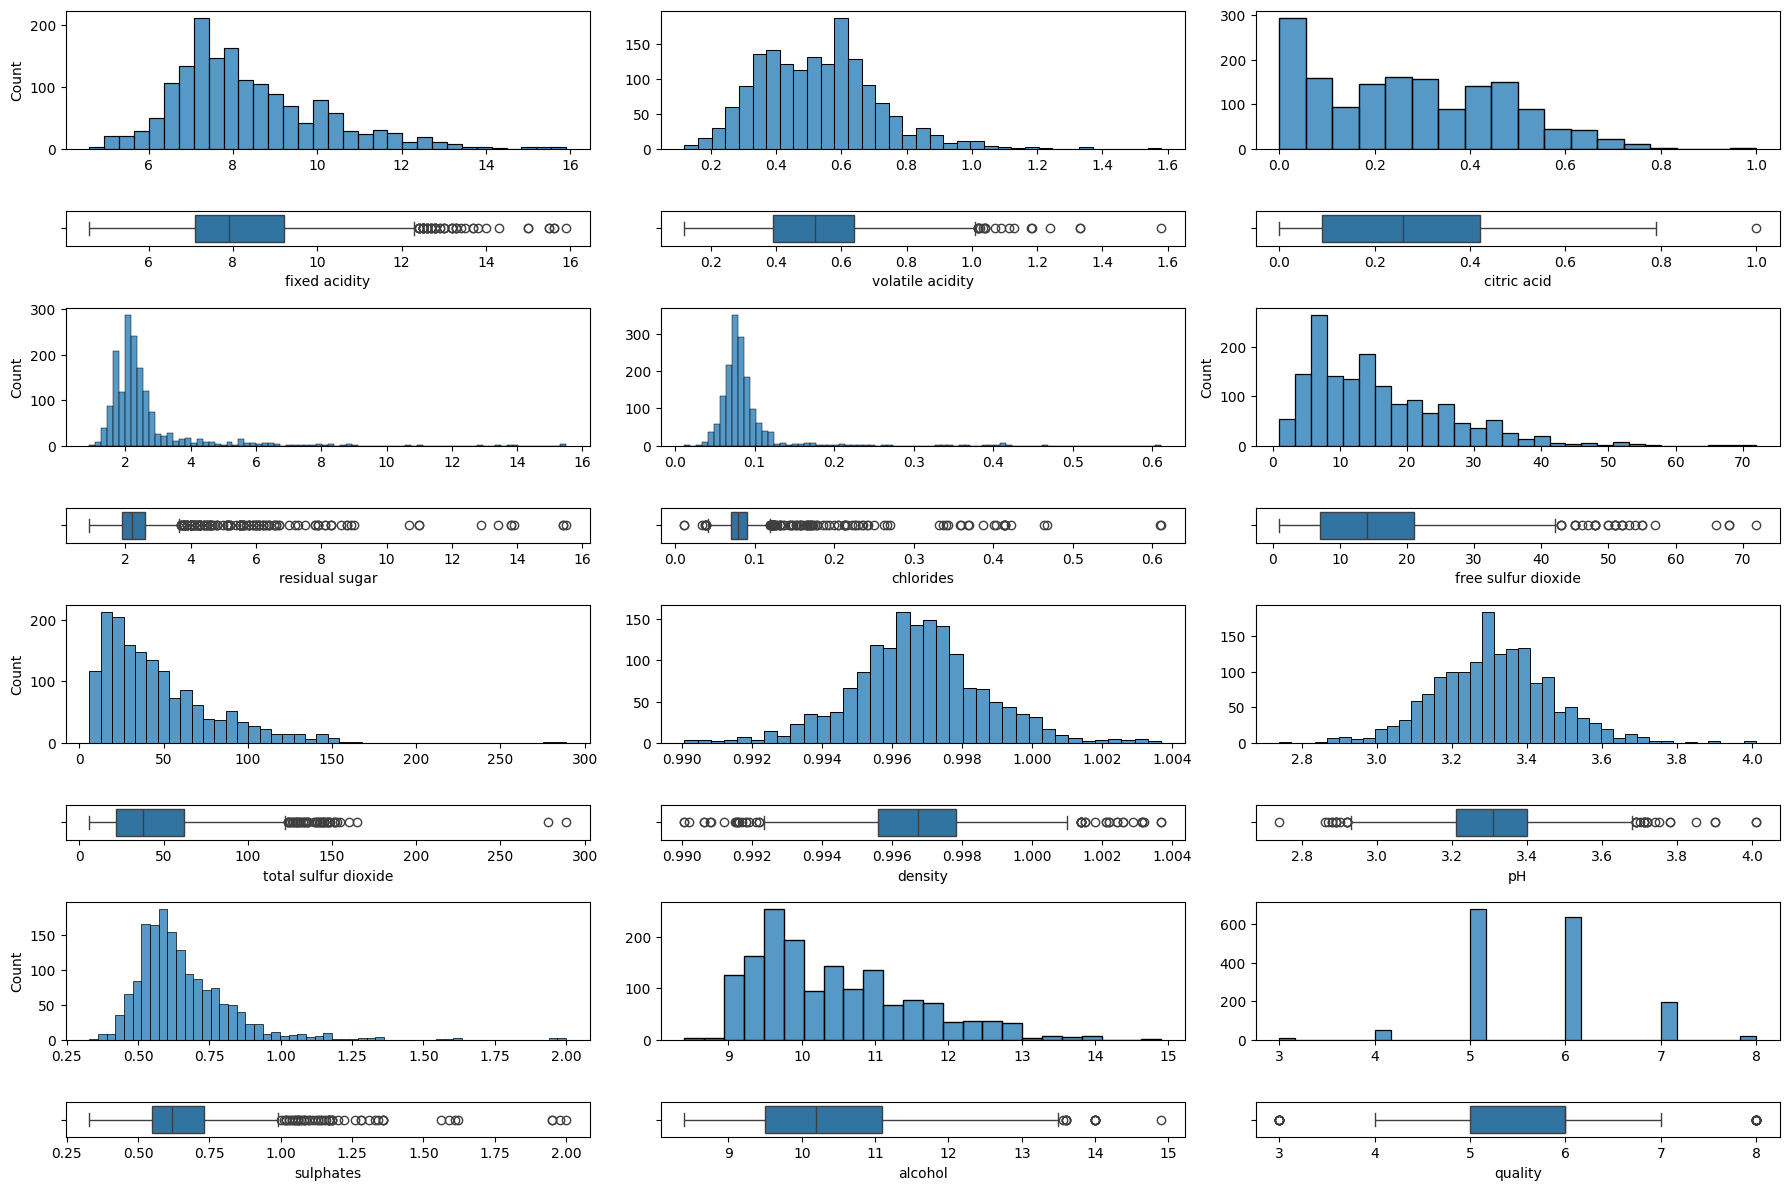

In [43]:
fig, axis = plt.subplots(8, 3, figsize = (18, 12), gridspec_kw={'height_ratios': [4, 1, 4, 1, 4, 1, 4, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "fixed acidity").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_dataf, x = "fixed acidity")

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "volatile acidity").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_dataf, x = "volatile acidity")

sns.histplot(ax = axis[0, 2], data = total_dataf, x = "citric acid").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_dataf, x = "citric acid")



sns.histplot(ax = axis[2, 0], data = total_dataf, x = "residual sugar").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_dataf, x = "residual sugar")

sns.histplot(ax = axis[2, 1], data = total_dataf, x = "chlorides").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_dataf, x = "chlorides")

sns.histplot(ax = axis[2, 2], data = total_dataf, x = "free sulfur dioxide").set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = total_dataf, x = "free sulfur dioxide")



sns.histplot(ax = axis[4, 0], data = total_dataf, x = "total sulfur dioxide").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = total_dataf, x = "total sulfur dioxide")

sns.histplot(ax = axis[4, 1], data = total_dataf, x = "density").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = total_dataf, x = "density")

sns.histplot(ax = axis[4, 2], data = total_dataf, x = "pH").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 2], data = total_dataf, x = "pH")



sns.histplot(ax = axis[6, 0], data = total_dataf, x = "sulphates").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = total_dataf, x = "sulphates")

sns.histplot(ax = axis[6, 1], data = total_dataf, x = "alcohol").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 1], data = total_dataf, x = "alcohol")

sns.histplot(ax = axis[6, 2], data = total_dataf, x = "quality").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 2], data = total_dataf, x = "quality")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

### Análisis numérico-numérico

Tomaremos el dato "quality" como variable objetivo

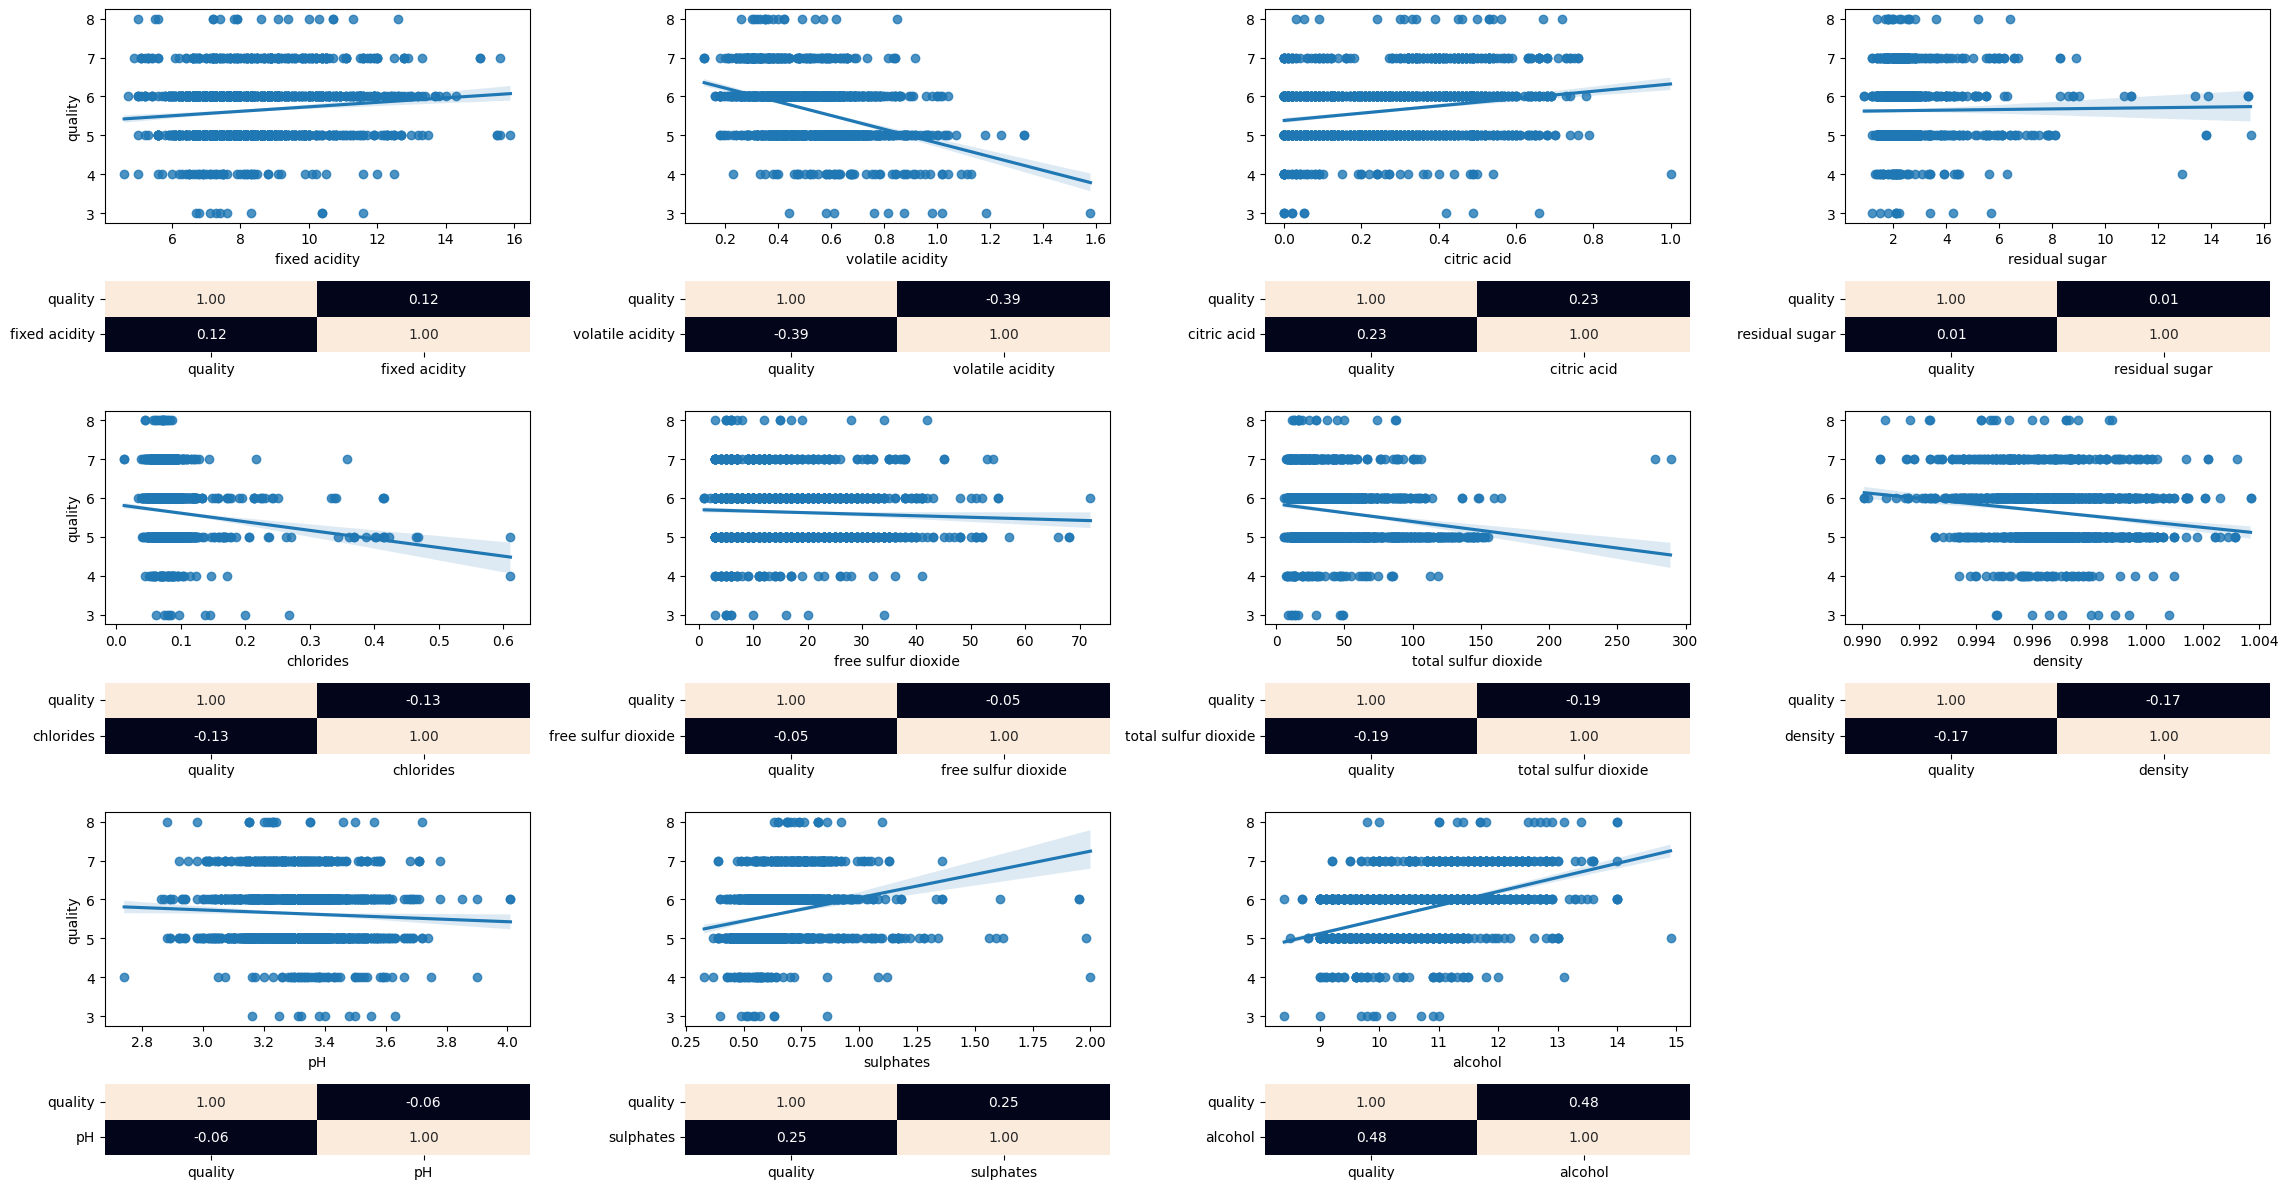

In [44]:
fig, axis = plt.subplots(6, 4, figsize = (23, 12), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "fixed acidity", y = "quality")
sns.heatmap(total_dataf[["quality", "fixed acidity"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "volatile acidity", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "volatile acidity"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "citric acid", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "citric acid"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = total_dataf, x = "residual sugar", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "residual sugar"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)



sns.regplot(ax = axis[2, 0], data = total_dataf, x = "chlorides", y = "quality")
sns.heatmap(total_dataf[["quality", "chlorides"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = total_dataf, x = "free sulfur dioxide", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "free sulfur dioxide"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = total_dataf, x = "total sulfur dioxide", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "total sulfur dioxide"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

sns.regplot(ax = axis[2, 3], data = total_dataf, x = "density", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "density"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)



sns.regplot(ax = axis[4, 0], data = total_dataf, x = "pH", y = "quality")
sns.heatmap(total_dataf[["quality", "pH"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = total_dataf, x = "sulphates", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "sulphates"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[4, 2], data = total_dataf, x = "alcohol", y = "quality").set(ylabel=None)
sns.heatmap(total_dataf[["quality", "alcohol"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 2], cbar = False)

fig.delaxes(axis[4, 3])
fig.delaxes(axis[5, 3])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones entre variables numéricas

Vamos a explorar la relación entre: "fixed acidity" con "pH", "residual sugar" con "density", "residual sugar" con "alcohol", "total sulfur dioxide" con "alcohol"

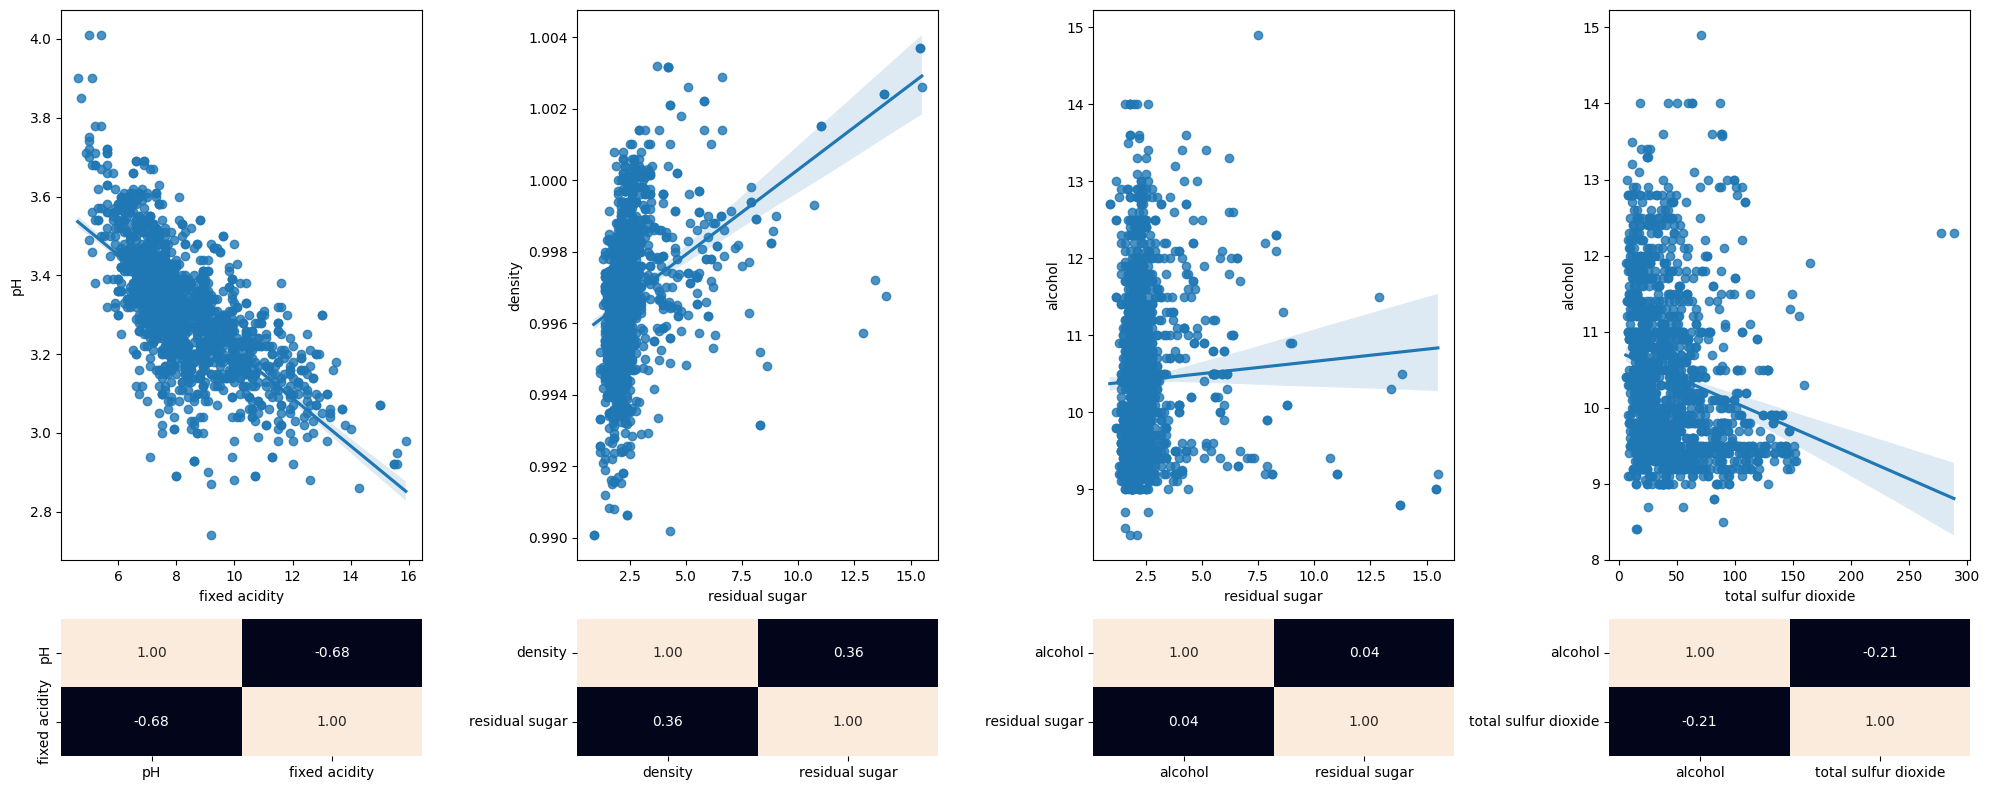

In [45]:
fig, axis = plt.subplots(2, 4, figsize = (20, 8), gridspec_kw={'height_ratios': [4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "fixed acidity", y = "pH")
sns.heatmap(total_dataf[["pH", "fixed acidity"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "residual sugar", y = "density")
sns.heatmap(total_dataf[["density", "residual sugar"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "residual sugar", y = "alcohol")
sns.heatmap(total_dataf[["alcohol", "residual sugar"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = total_dataf, x = "total sulfur dioxide", y = "alcohol")
sns.heatmap(total_dataf[["alcohol", "total sulfur dioxide"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones post-mapa de calor

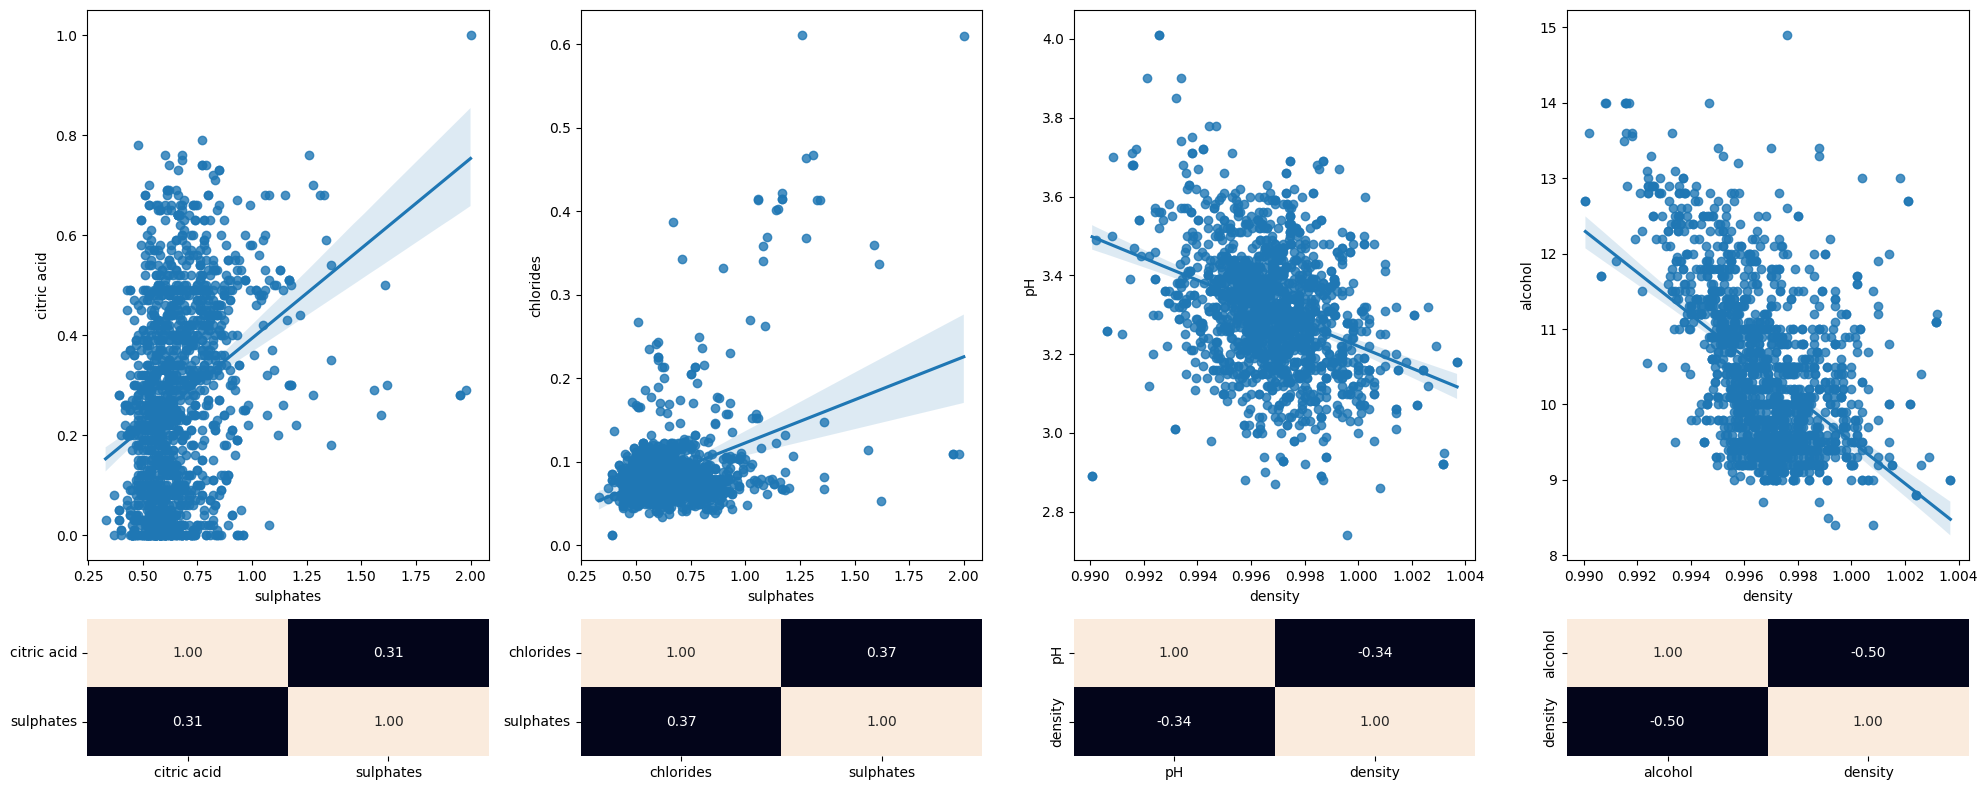

In [46]:
fig, axis = plt.subplots(2, 4, figsize = (20, 8), gridspec_kw={'height_ratios': [4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "sulphates", y = "citric acid")
sns.heatmap(total_dataf[["citric acid", "sulphates"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "sulphates", y = "chlorides")
sns.heatmap(total_dataf[["chlorides", "sulphates"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "density", y = "pH")
sns.heatmap(total_dataf[["pH", "density"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = total_dataf, x = "density", y = "alcohol")
sns.heatmap(total_dataf[["alcohol", "density"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de correlaciones (completo)

#### Mapa de calor

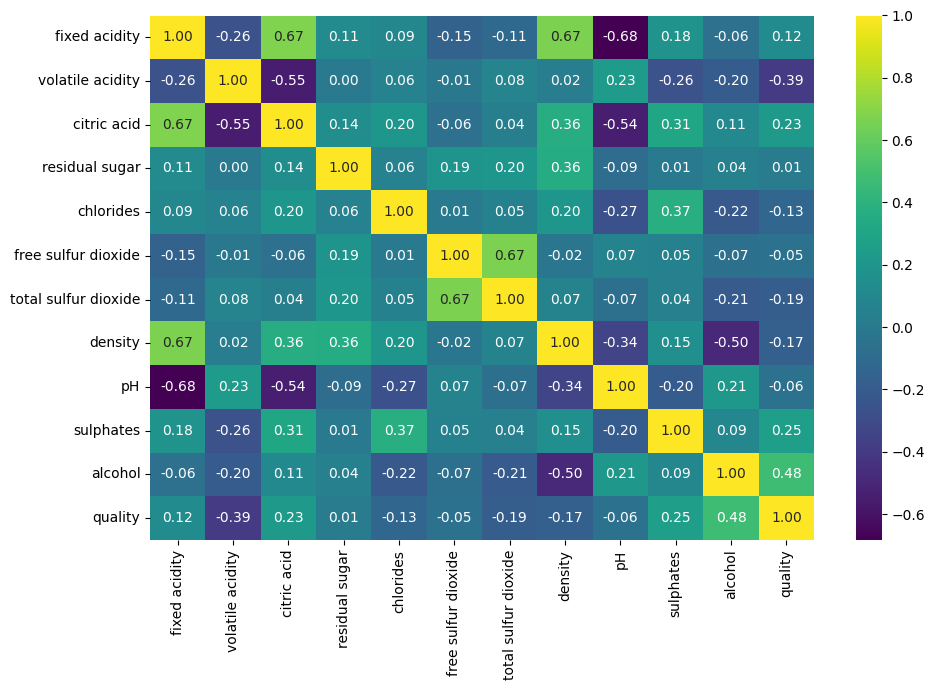

In [47]:
cols_num = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(total_dataf[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()

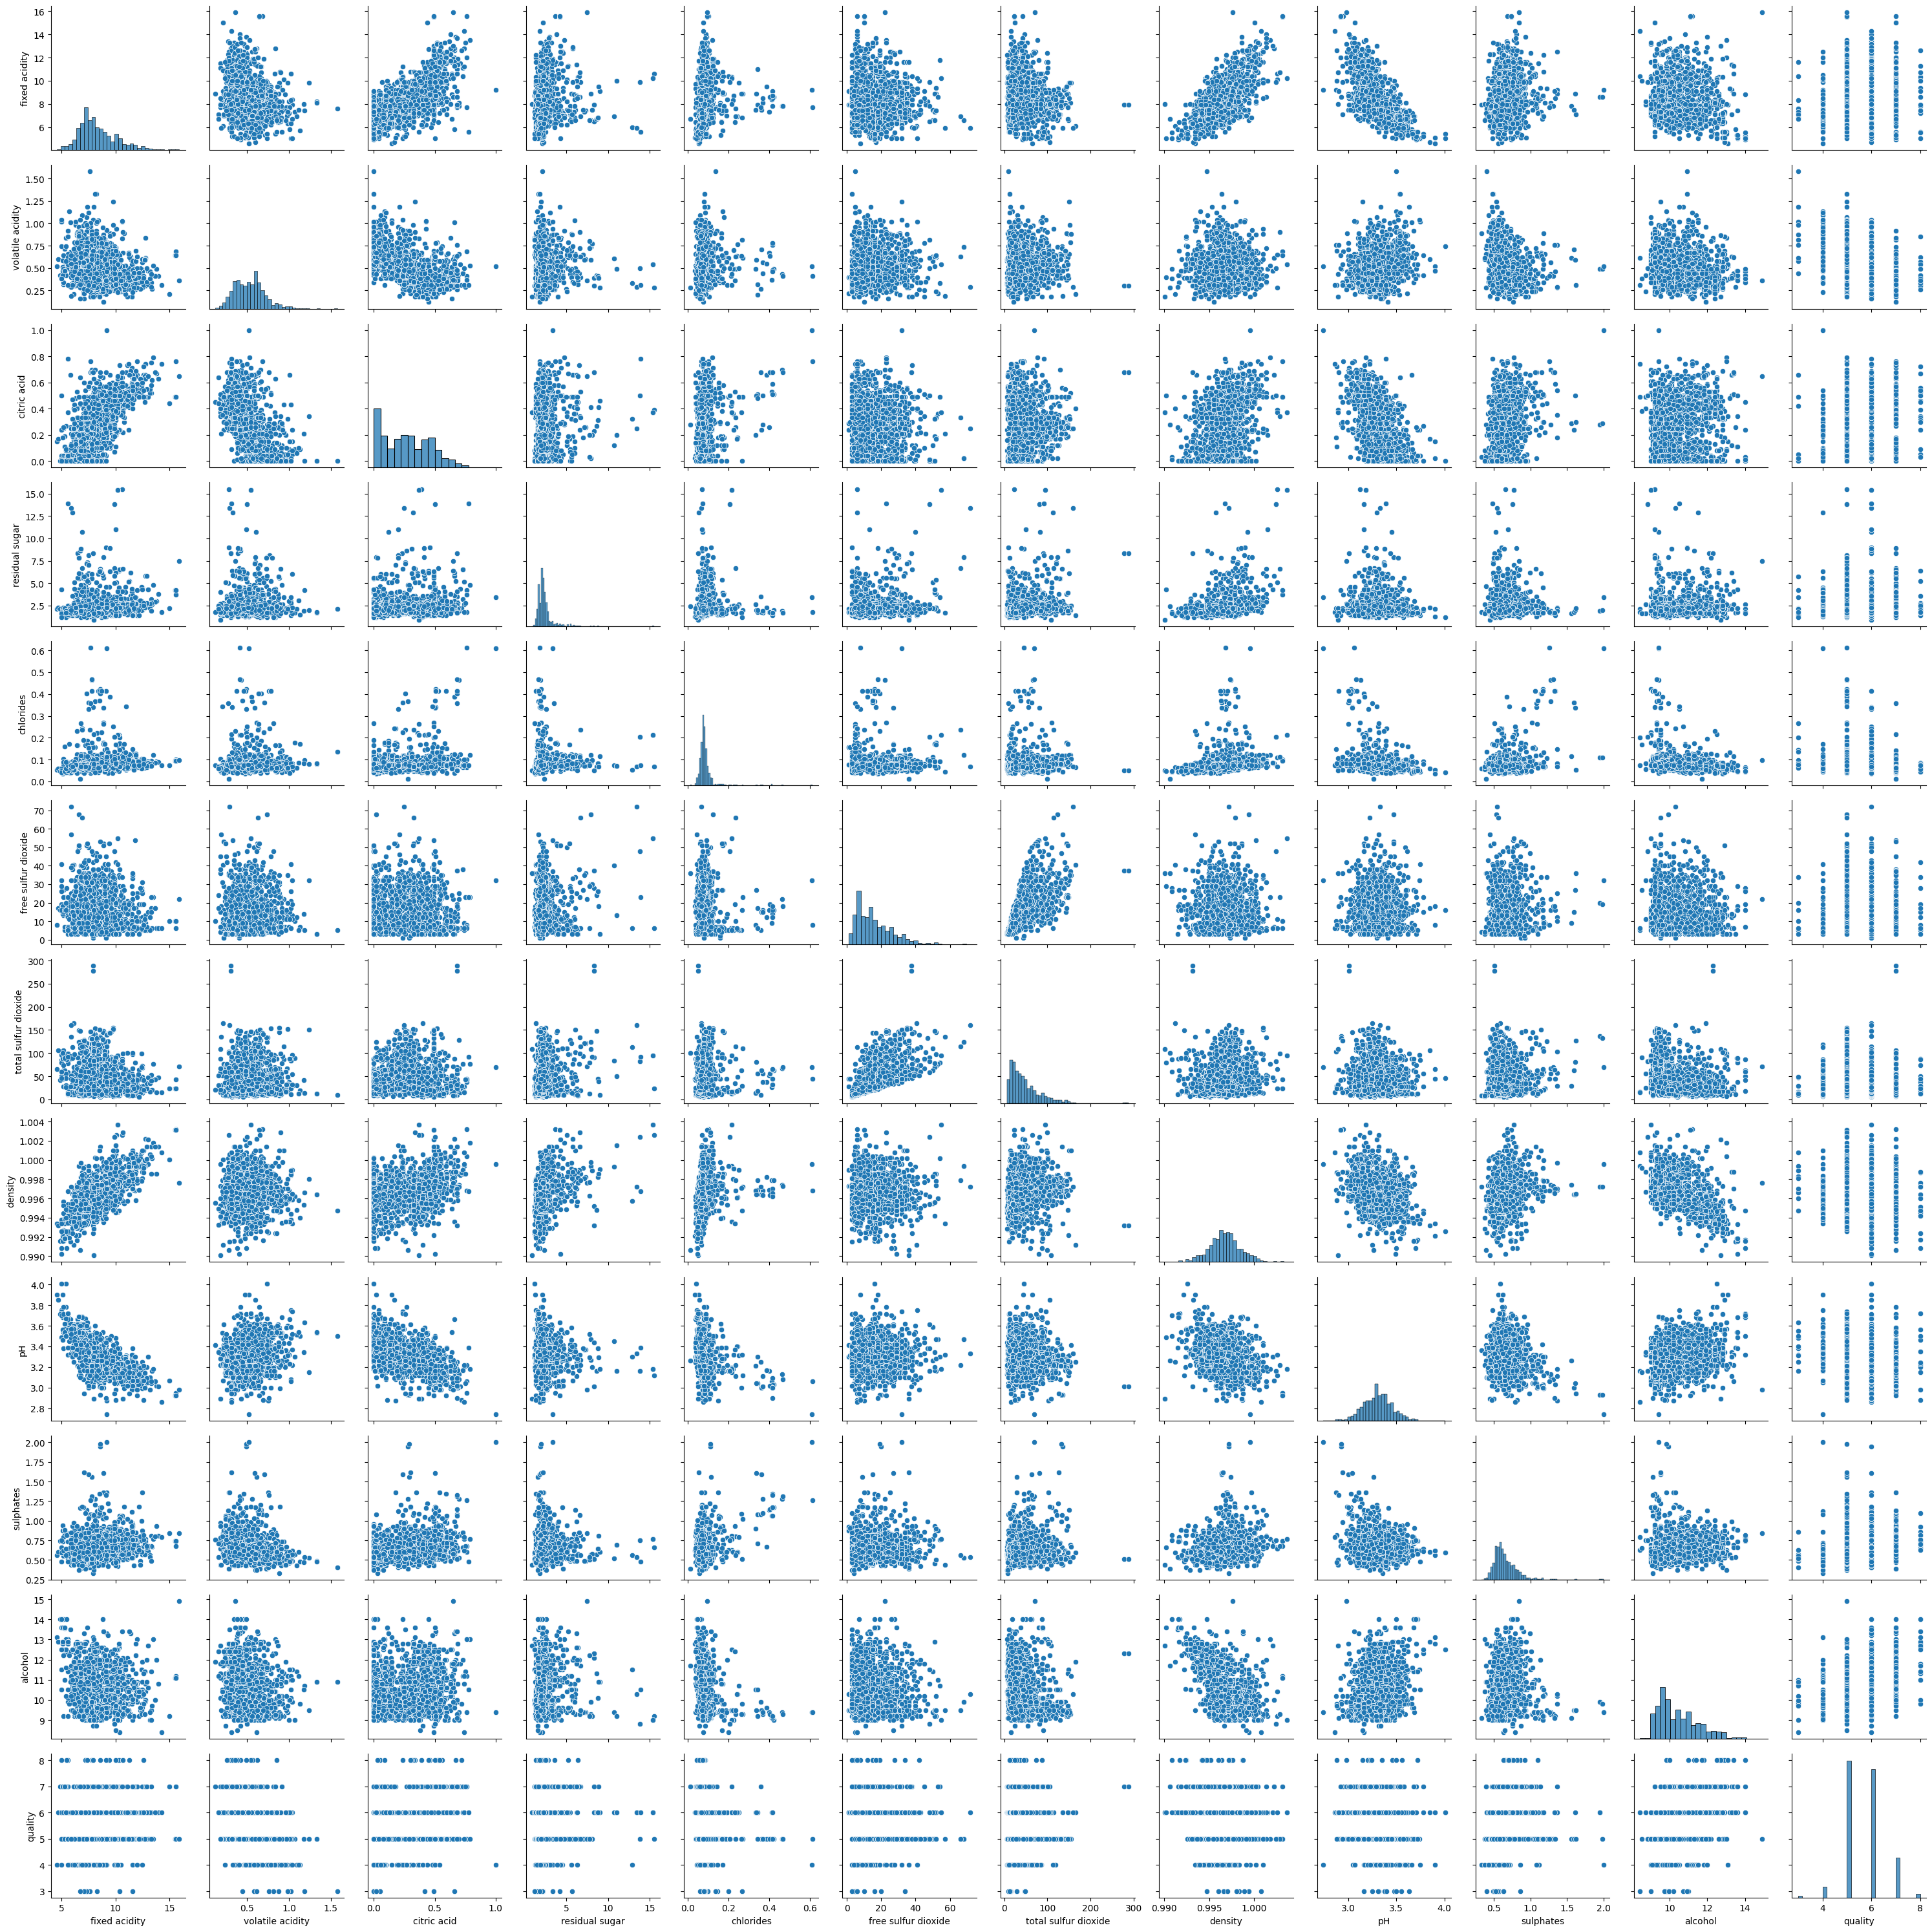

In [48]:
sns.pairplot(data = total_dataf)
plt.tight_layout()
plt.show()

## Feature engineering

### Análisis de outliers

In [49]:
FINAL_COLS = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
total_dataf = total_dataf[FINAL_COLS]
total_dataf.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [50]:
# Guardamos todos los datasets:

total_data_CON_outliers = total_dataf.copy()
total_data_SIN_outliers = total_dataf.copy()

outliers_cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']

def replace_outliers(column, df):
  col_stats = total_dataf[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

with open("../data/processed/outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)

### Análisis de valores faltantes

In [51]:
print(total_data_CON_outliers.isnull().sum().sort_values(ascending=False))
print(total_data_SIN_outliers.isnull().sum().sort_values(ascending=False))
print("No hay valores faltantes en ningún dataframe.")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
No hay valores faltantes en ningún dataframe.


### Inferencia de nuevas características

### Escalado de valores

In [52]:
predictoras = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = "quality"

X_CON = total_data_CON_outliers.drop(target, axis = 1)[predictoras]
X_SIN = total_data_SIN_outliers.drop(target, axis = 1)[predictoras]
y = total_data_CON_outliers[target]

X_train_CON_outliers, X_test_CON_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 10)
X_train_SIN_outliers, X_test_SIN_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 10)

In [53]:
# Normalización

norm_CON_outliers = StandardScaler()

norm_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_norm = norm_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_norm = pd.DataFrame(X_train_CON_outliers_norm, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_norm = norm_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_norm = pd.DataFrame(X_test_CON_outliers_norm, index = X_test_CON_outliers.index, columns = predictoras)

# SIN OUTLIERS
norm_SIN_outliers = StandardScaler()
norm_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_norm = norm_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_norm = pd.DataFrame(X_train_SIN_outliers_norm, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_norm = norm_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_norm = pd.DataFrame(X_test_SIN_outliers_norm, index = X_test_SIN_outliers.index, columns = predictoras)


# ESCALADO MIN-MAX (MINMAXIMIZACIÓN)

scaler_CON_outliers = MinMaxScaler()
scaler_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_scal = scaler_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_scal = pd.DataFrame(X_train_CON_outliers_scal, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_scal = scaler_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_scal = pd.DataFrame(X_test_CON_outliers_scal, index = X_test_CON_outliers.index, columns = predictoras)

# SIN OUTLIERS
scaler_SIN_outliers = MinMaxScaler()
scaler_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_scal = scaler_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_scal = pd.DataFrame(X_train_SIN_outliers_scal, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_scal = scaler_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_scal = pd.DataFrame(X_test_SIN_outliers_scal, index = X_test_SIN_outliers.index, columns = predictoras)


# Guardado de los datasets resultantes
X_train_CON_outliers.to_excel("../data/processed/X_train_CON_outliers.xlsx", index = False)
X_train_CON_outliers_norm.to_excel("../data/processed/X_train_CON_outliers_norm.xlsx", index = False)
X_train_CON_outliers_scal.to_excel("../data/processed/X_train_CON_outliers_scal.xlsx", index = False)
X_train_SIN_outliers.to_excel("../data/processed/X_train_SIN_outliers.xlsx", index = False)
X_train_SIN_outliers_norm.to_excel("../data/processed/X_train_SIN_outliers_norm.xlsx", index = False)
X_train_SIN_outliers_scal.to_excel("../data/processed/X_train_SIN_outliers_scal.xlsx", index = False)

X_test_CON_outliers.to_excel("../data/processed/X_test_CON_outliers.xlsx", index = False)
X_test_CON_outliers_norm.to_excel("../data/processed/X_test_CON_outliers_norm.xlsx", index = False)
X_test_CON_outliers_scal.to_excel("../data/processed/X_test_CON_outliers_scal.xlsx", index = False)
X_test_SIN_outliers.to_excel("../data/processed/X_test_SIN_outliers.xlsx", index = False)
X_test_SIN_outliers_norm.to_excel("../data/processed/X_test_SIN_outliers_norm.xlsx", index = False)
X_test_SIN_outliers_scal.to_excel("../data/processed/X_test_SIN_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

# SCALERS

with open("../models/norm_CON_outliers.pkl", "wb") as file:
  pickle.dump(norm_CON_outliers, file)
with open("../models/norm_SIN_outliers.pkl", "wb") as file:
  pickle.dump(norm_SIN_outliers, file)
with open("../models/scaler_CON_outliers.pkl", "wb") as file:
  pickle.dump(scaler_CON_outliers, file)
with open("../models/scaler_SIN_outliers.pkl", "wb") as file:
  pickle.dump(scaler_SIN_outliers, file)

## Feature Selection

In [54]:
X_train = X_train_CON_outliers.copy()
X_test = X_test_CON_outliers.copy()

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

volatile acidity  citric acid  total sulfur dioxide  sulphates  alcohol
0              0.51         0.00                  54.0       0.93     10.7
1              0.42         0.39                  12.0       0.69     11.7
2              0.66         0.00                  23.0       0.96      9.9
3              0.29         0.33                  27.0       0.84     11.7
4              0.46         0.17                  11.0       0.54     11.4